In [1]:
# Lets load some libraries and car data and precalculated features
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)

load("data/fsecure.train.RData")


Warning message:
“package ‘dplyr’ was built under R version 3.3.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘tidyr’ was built under R version 3.3.2”

In [14]:
autodata %>% 
group_by(merkki) %>% 
summarise(n=n()) %>% 
arrange(-n) %>% 
mutate(k=row_number())

merkki,n,k
TOYOTA,349607,1
VOLKSWAGEN,294833,2
VOLVO,211206,3
FORD,194595,4
NISSAN,166141,5
MERCEDES-BENZ,158122,6
OPEL,151679,7
AUDI,115344,8
SKODA,112569,9
PEUGEOT,104909,10


ajoneuvoluokka,ryhma,ajoneuvonkaytto,kayttoonottoVuosi,matkamittarilukema,vari,kori,kori.orig,kori.est,omamassa,⋯,polttoaine,kuntanimi,Co2,Co2.orig,Co2.modelled,merkki,mallimerkinta,l.malli,malli,N.merkki
Henkilöauto,Henkilö,Yksityinen,1997,355890,Vihreä,Farmari,Farmari,Farmari,1320,⋯,Bensiini,Kouvola,205.3317,NA,205.3317,VOLKSWAGEN,5D PASSAT VARIANT 1.8 CL-351-C/263,PASSAT,PASSAT,294833
Henkilöauto,Henkilö,Yksityinen,1984,NA,Ruskea,Viistoperä,NA,Viistoperä,780,⋯,Bensiini,Oulu,179.9998,NA,179.9998,FORD,2D FIESTA 1.1-FBD/2280,FIESTA,FIESTA,194595
Henkilöauto,Henkilö,Myyntivarasto,1990,NA,Valkoinen,Sedan,NA,Sedan,1060,⋯,Bensiini,Helsinki,204.1334,NA,204.1334,CITROEN,4D SEDAN BX 19 GTI-XBEY/2650,BX,BX,74110
Henkilöauto,Henkilö,Yksityinen,2003,108731,Punainen,Viistoperä,Viistoperä,Viistoperä,955,⋯,Bensiini,Pori,143.0000,143,142.4133,RENAULT,2D CLIO HATCHBACK 1.2-CB0FCF/247,CLIO,CLIO,70913
Henkilöauto,Henkilö,Yksityinen,2003,238435,Sininen,Sedan,Sedan,Sedan,1462,⋯,Bensiini,Tampere,190.0000,190,190.5217,HONDA,4D ACCORD SEDAN 2.0-CL75/268,ACCORD,ACCORD,77384
Henkilöauto,Henkilö,Yksityinen,2006,109030,Hopea,Farmari,Farmari,Farmari,1270,⋯,Bensiini,Ähtäri,172.0000,172,171.8726,TOYOTA,5D COROLLA STW 1.6-ZZE121L-DWMNKW/260,COROLLA,COROLLA,349607


In [35]:
kunnat.merkit<-
  autodata %>% 
  group_by(merkki) %>% 
  mutate(N.merkki=n()) %>% ungroup %>% 
  mutate(merkki=ifelse(N.merkki < 500, "other",merkki)) %>%
  count(merkki, kuntanimi) %>% 
  spread(merkki, n, fill=0) 

dim(kunnat.merkit)

[1] 315  57

kuntanimi,ADRIA,ALFA ROMEO,AUDI,BMW,CADILLAC,CHEVROLET,CHRYSLER,CITROEN,DACIA,⋯,ROVER,SAAB,SEAT,SKODA,SMART,SUBARU,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO
Äänekoski,5,14,387,291,6,58,96,272,26,⋯,3,185,114,340,2,71,73,1885,1079,722
Ähtäri,2,2,131,84,1,24,23,77,10,⋯,1,32,45,96,0,7,12,762,330,232
Akaa,9,16,335,303,21,80,90,300,15,⋯,5,143,89,291,8,27,41,1105,865,714
Alajärvi,8,8,169,199,7,39,38,123,11,⋯,0,51,107,149,1,18,23,801,593,451
Alavieska,0,1,62,41,0,10,12,36,3,⋯,0,9,21,62,0,3,5,195,208,183
Alavus,5,14,267,233,4,39,51,185,20,⋯,3,79,95,162,3,30,33,1348,739,496
Asikkala,2,8,194,135,6,37,43,125,13,⋯,5,44,64,171,0,67,43,585,567,435
Askola,5,8,98,98,3,36,28,85,8,⋯,0,23,32,109,3,23,25,370,280,223
Aura,0,2,69,104,2,13,20,77,6,⋯,0,33,32,106,2,6,11,310,301,168
Brändö,0,0,0,0,0,0,1,0,0,⋯,0,0,0,1,0,0,1,3,3,1


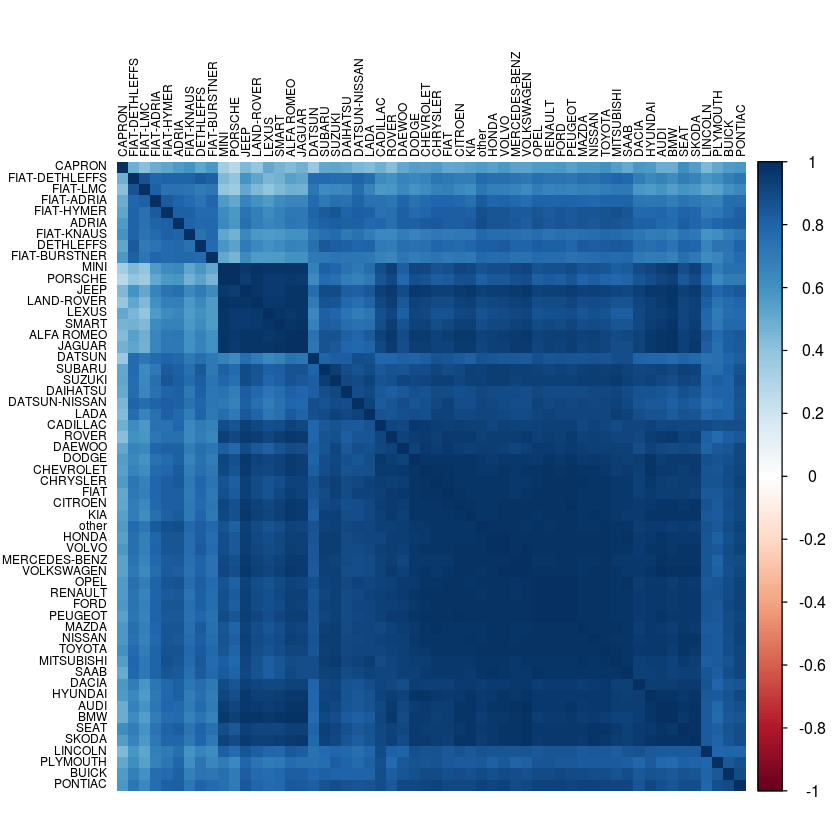

In [36]:
cor.matrix <- select(kunnat.merkit, -kuntanimi) %>% 
  cor(.,use="na.or.") 

corrplot(cor.matrix, order="hclust", 
         hclust.method="ward.D", 
         tl.cex=0.6,tl.col="black", 
         method="shade")

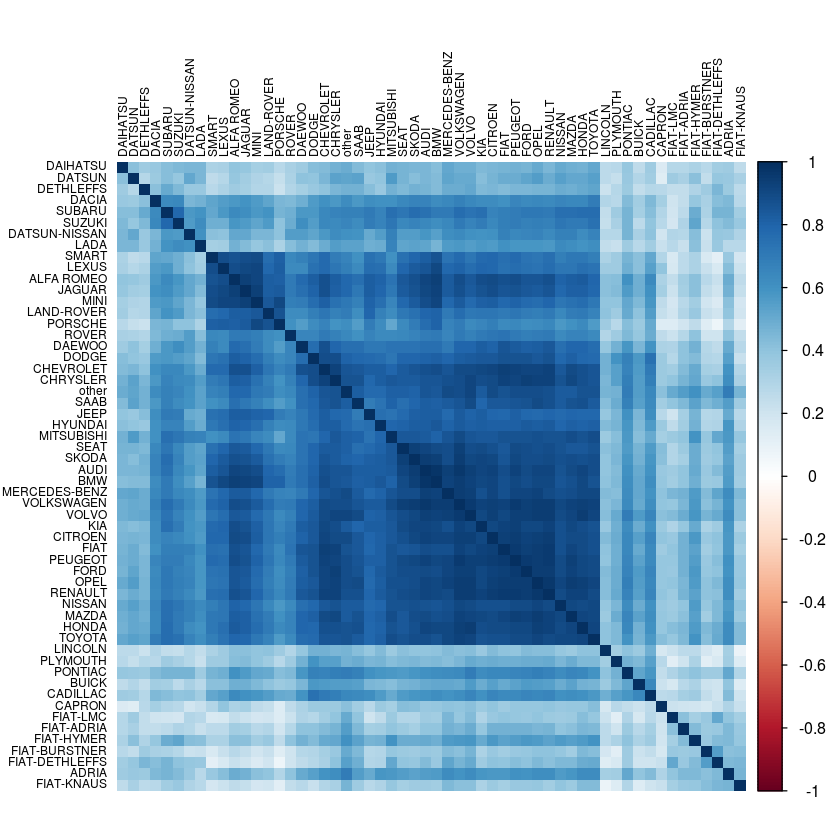

In [44]:
x<-kunnat.merkit
x$N<-select(x,-kuntanimi) %>% 
rowSums

x<-mutate_at(x, vars(-kuntanimi,-N), funs(./sqrt(N)))

cor.matrix <- select(x,-kuntanimi,-N) %>% 
  cor(.,use="na.or.") 

corrplot(cor.matrix, order="hclust", 
         hclust.method="complete", 
         tl.cex=0.6,tl.col="black", 
         method="shade")